In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
data = pd.read_csv('sales_data_with_discounts.csv')

# Display the first few rows of the dataset
print(data.head())

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [36]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include='number').columns
numerical_cols 

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [7]:
# Calculate basic statistics
mean_values = data[numerical_cols].mean()
median_values = data[numerical_cols].median()
mode_values = data[numerical_cols].mode().iloc[0]  # Mode returns a Series, take the first mode
std_dev_values = data[numerical_cols].std()

In [8]:
# Create a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_dev_values
})

print("Descriptive Statistics:\n", summary_stats)

Descriptive Statistics:
                            Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


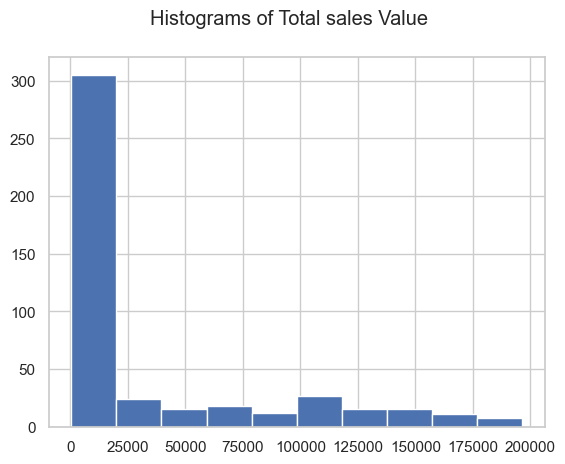

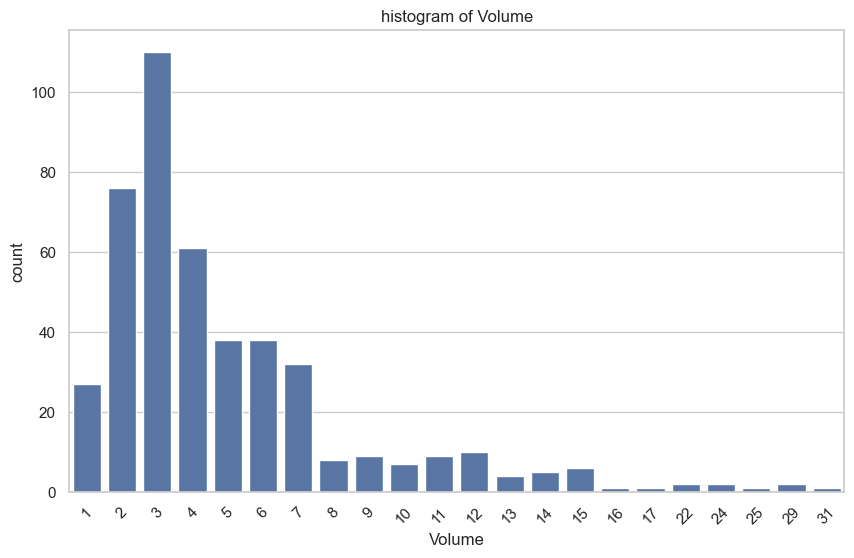

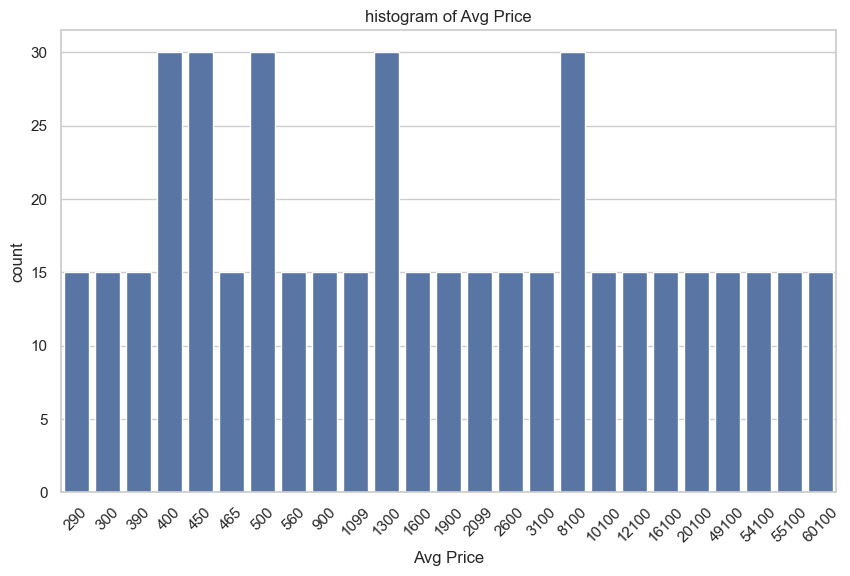

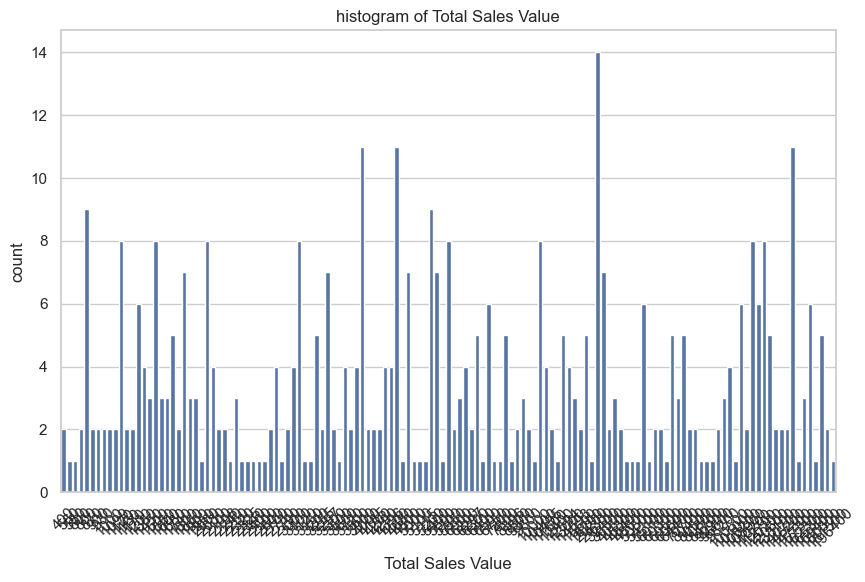

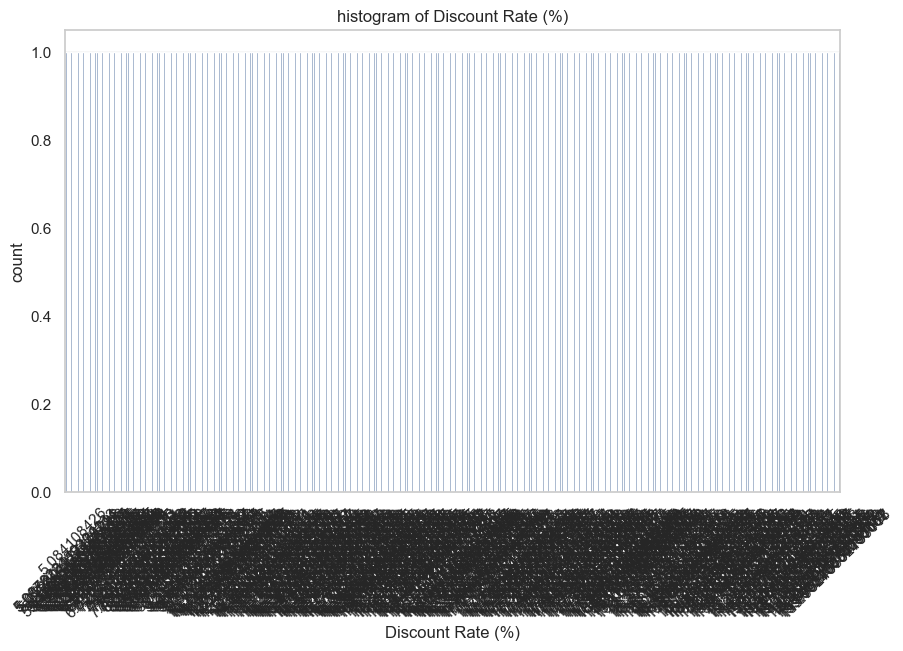

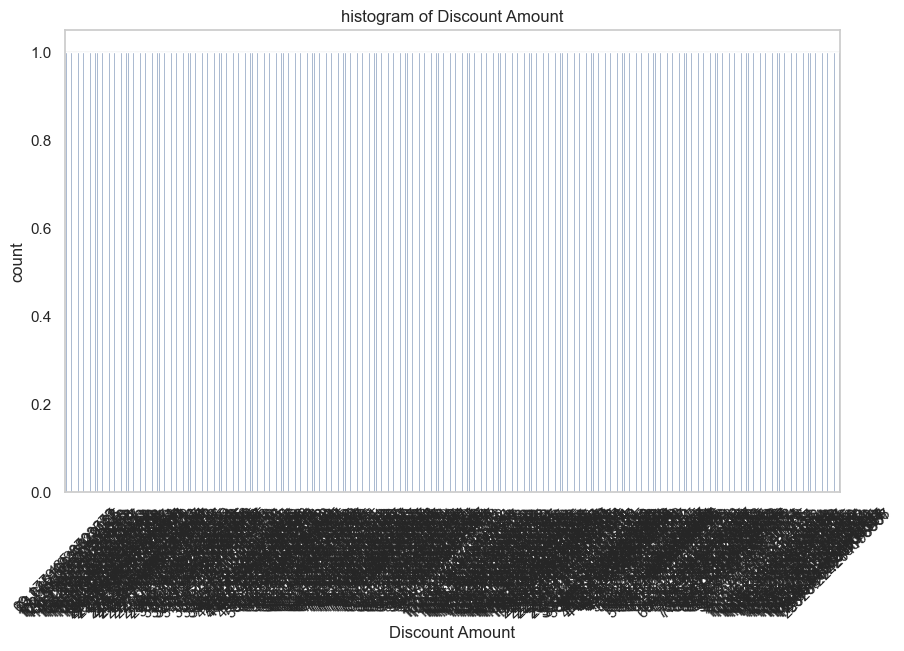

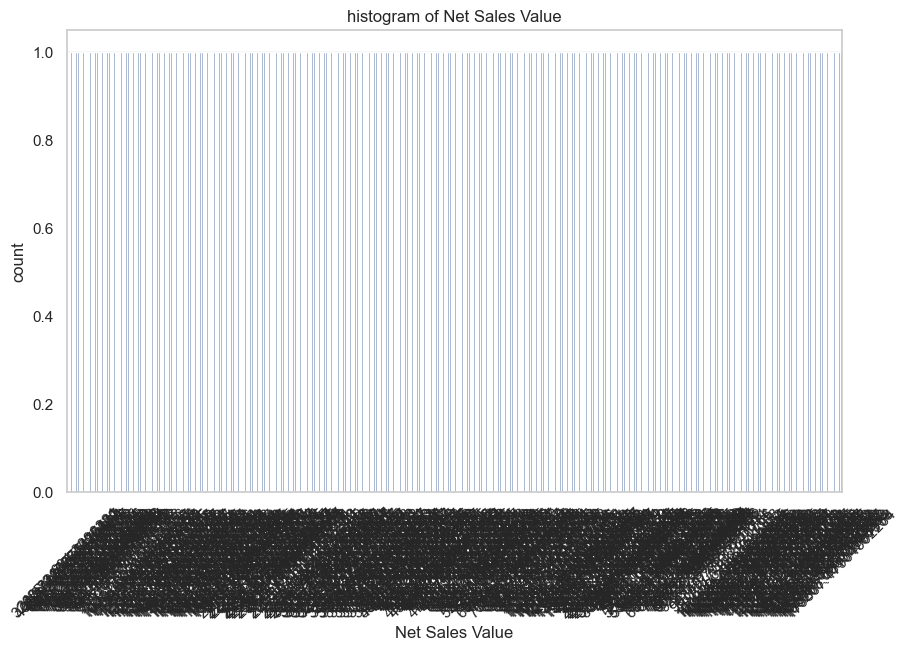

In [37]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include='number').columns
numerical_cols 

# Set the style
sns.set(style='whitegrid')
# Plot histograms for each numerical column
plt.hist(data['Total Sales Value'])
plt.suptitle('Histograms of Total sales Value')
plt.show()

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'histogram of {col}')
    plt.xticks(rotation=45)
    plt.show()



In [31]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

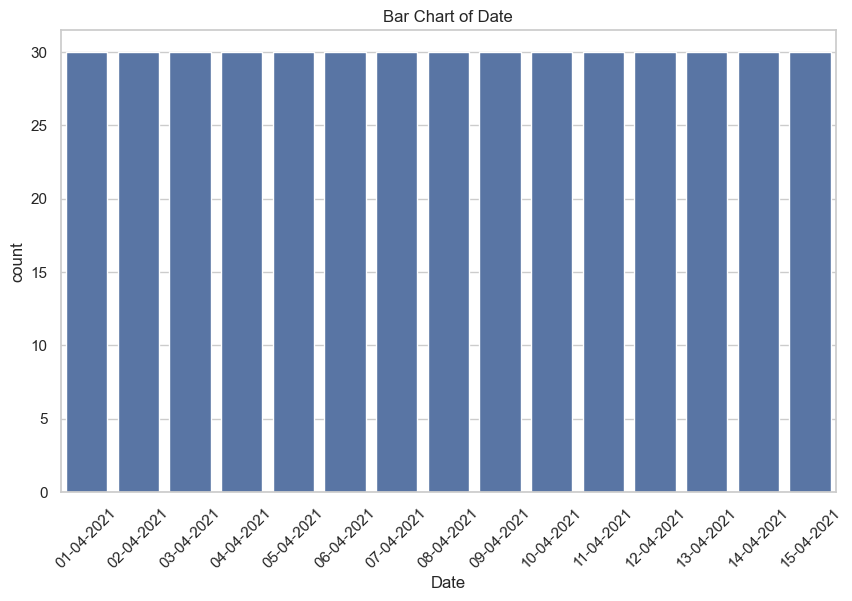

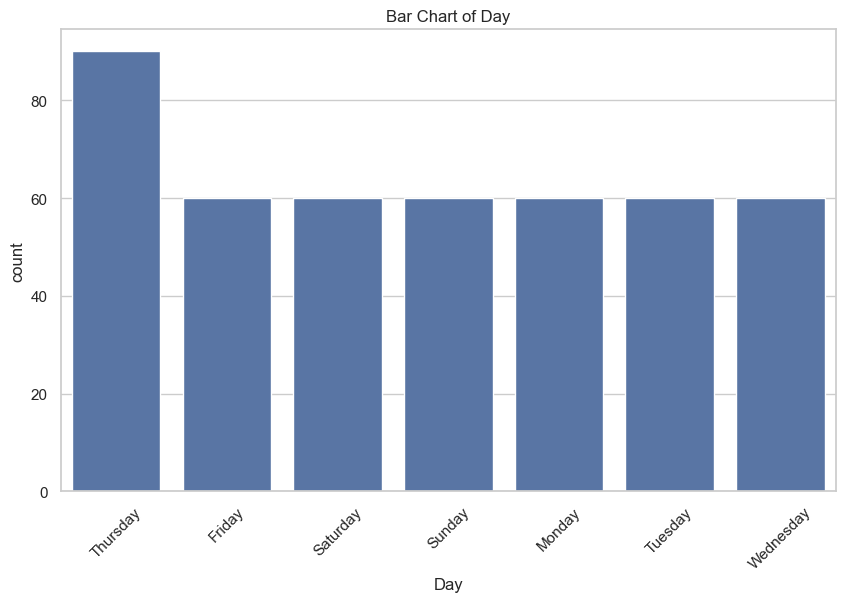

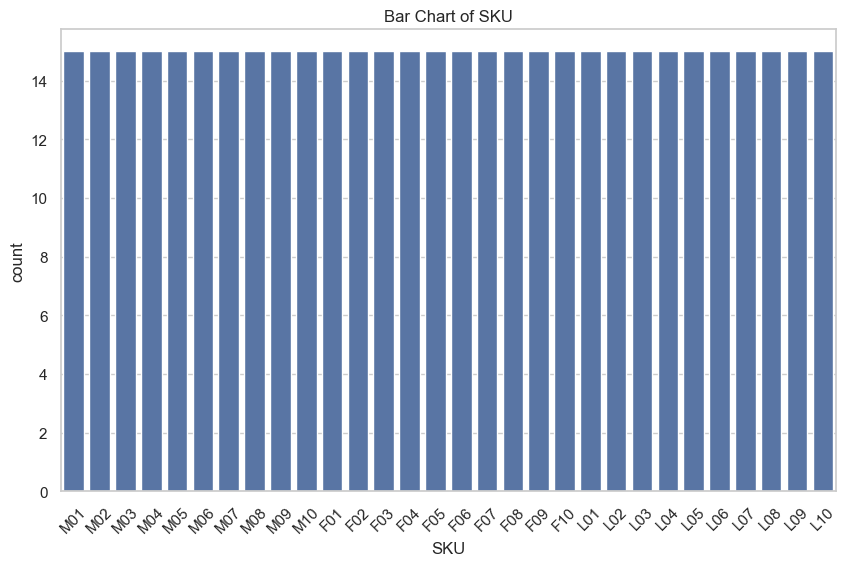

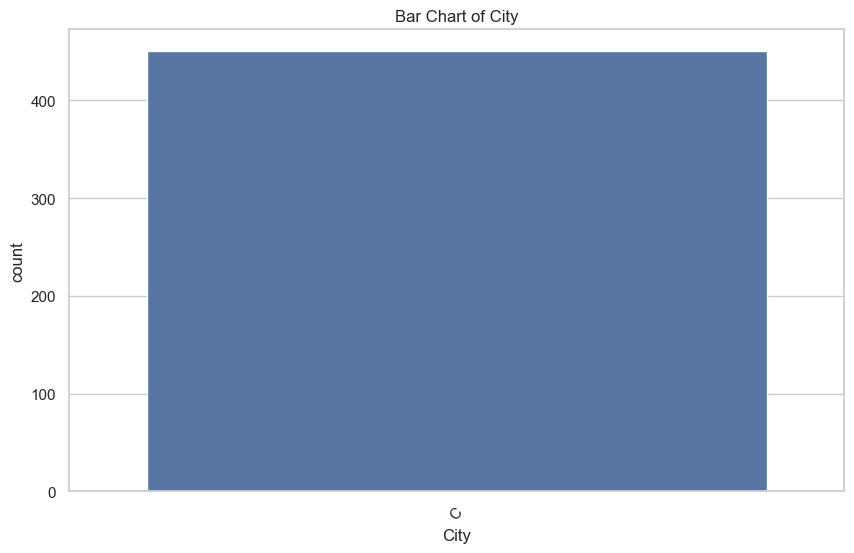

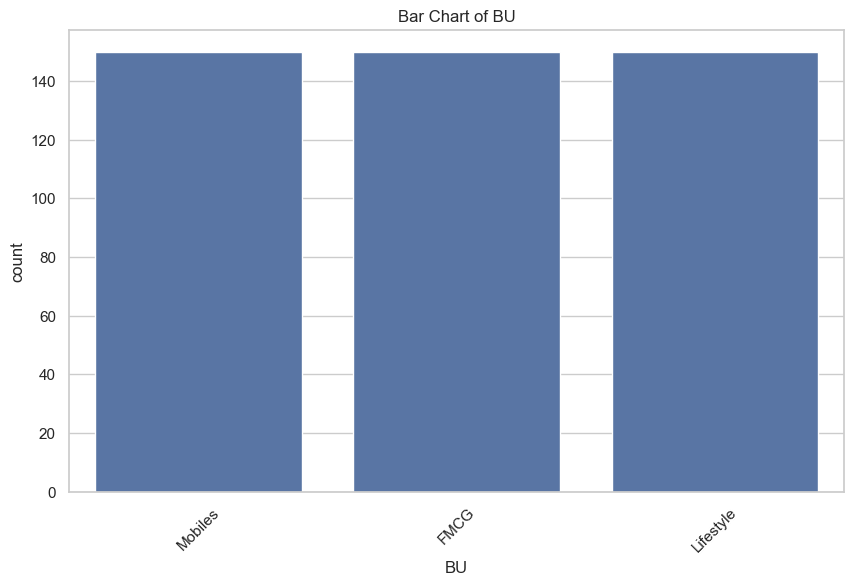

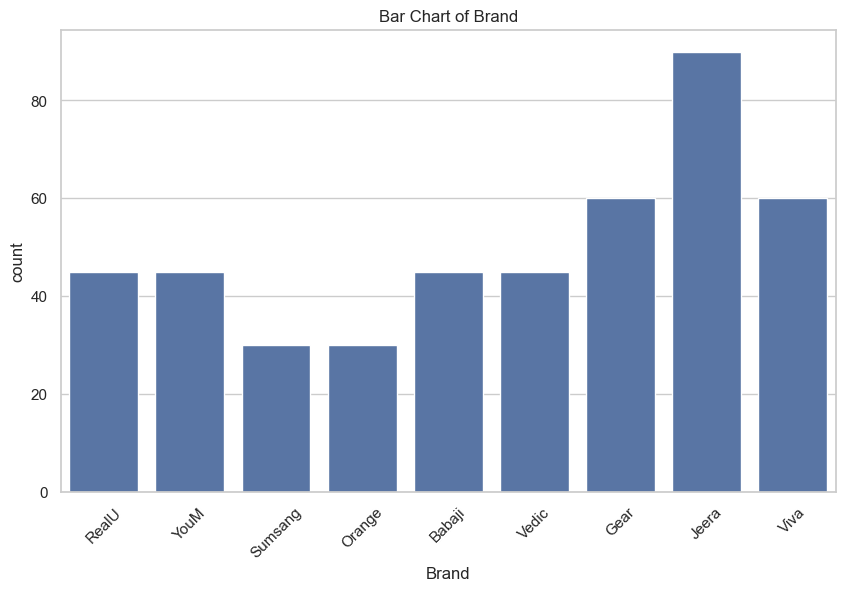

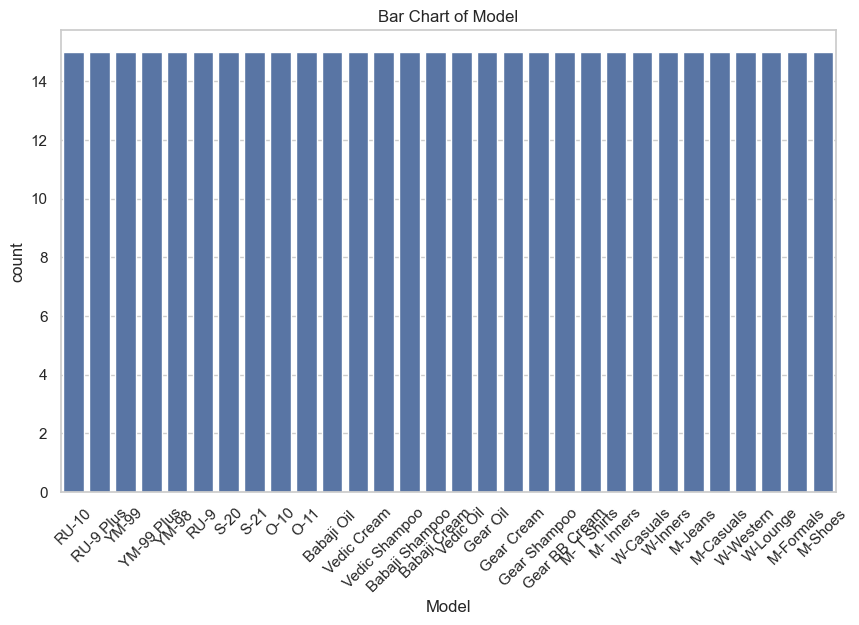

In [35]:
# Create bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()




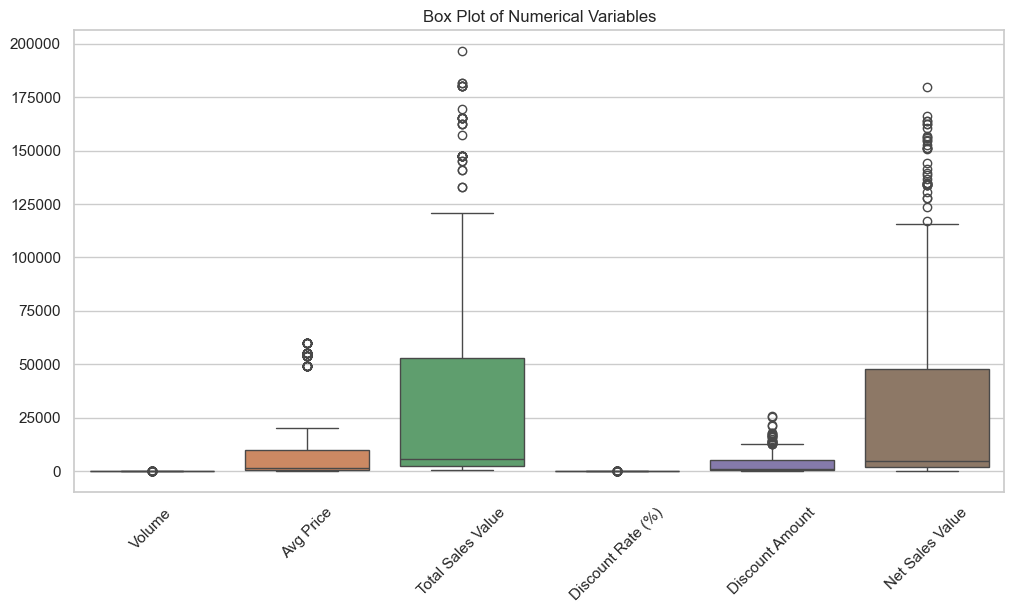

In [38]:
# Create boxplots for numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_cols])
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()



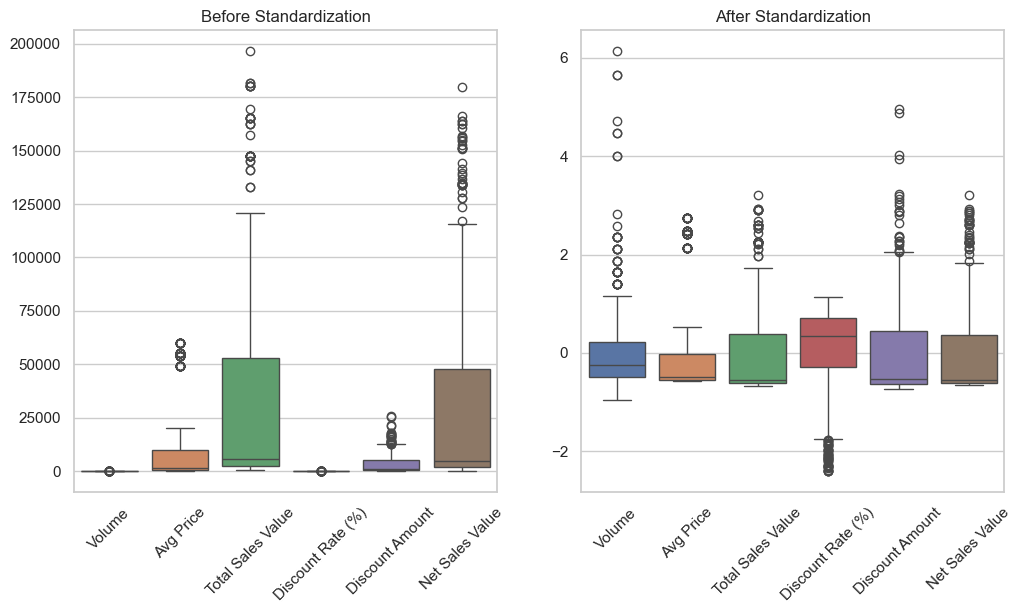

In [40]:
from sklearn.preprocessing import StandardScaler

# Explain the concept of standardization (z-score normalization)
# Standardization transforms the data to have a mean of 0 and a standard deviation of 1.

# Initialize the scaler
scaler = StandardScaler()

# Standardize numerical columns
data_standardized = data.copy()
data_standardized[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Show before and after comparisons
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data[numerical_cols])
plt.title('Before Standardization')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.boxplot(data=data_standardized[numerical_cols])
plt.title('After Standardization')
plt.xticks(rotation=45)
plt.show()


In [41]:
# Discuss the need for converting categorical data into dummy variables (one-hot encoding)
# This transformation is essential for machine learning algorithms that require numerical input.

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display a portion of the transformed dataset
print("Transformed Dataset with Dummy Variables:\n", data_encoded.head())


Transformed Dataset with Dummy Variables:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream 

# Conclusion

In this analysis, we performed descriptive analytics on the numerical columns of the dataset, calculated key statistics, and visualized data distributions through histograms and box plots. The categorical variables were analyzed using bar charts.

Standardization was applied to numerical variables, enhancing their suitability for analytical models. Additionally, we transformed categorical variables into dummy variables, preparing the dataset for machine learning applications.

These preprocessing steps are crucial for ensuring the quality and effectiveness of data analysis and predictive modeling in machine learning.
